## Building a Credit Scoring Model for Buy-Now-Pay-Later Services: A Comprehensive Analysis of Credit Risk Classification

## Overview
Credit scoring models are vital tools used by financial institutions to assess the creditworthiness of potential borrowers. As part of risk management, these models predict the likelihood of a borrower defaulting on a loan, which allows institutions to mitigate potential losses. Traditionally, credit scoring models rely on statistical methods to analyze historical data, identifying patterns and relationships between borrower behavior and loan outcomes.

In this challenge, we aim to build a comprehensive credit scoring model for Bati Bank, a leading financial institution collaborating with an eCommerce platform. The goal is to enhance their buy-now-pay-later service, allowing customers to purchase items on credit, based on their predicted creditworthiness. By developing a reliable and robust credit scoring model, Bati Bank can make informed lending decisions while minimizing the risk of defaults. This project involves data exploration, feature engineering, model development, and real-time deployment of the model via an API to assess credit risk and optimize loan terms.

## Objectives
The primary objectives of this project are as follows:

1. Define Credit Risk Proxy: Establish a proxy variable to categorize users as high-risk (bad) or low-risk (good) based on their likelihood of default.

2. Feature Engineering: Select relevant features from the data and engineer new ones that are strong predictors of default risk. This includes creating aggregate and extracted features, encoding categorical variables, handling missing data, and normalizing numerical features.

3. Develop a Credit Risk Model: Build and train machine learning models that assign risk probabilities to new customers based on historical transaction data.

4. Credit Scoring: Use the model's probability estimates to create a credit score for each customer, facilitating quick and accurate creditworthiness assessments.

5. Loan Optimization: Predict the optimal loan amount and duration for new customers, considering their risk profile to ensure sustainable lending practices.

6. Model Deployment: Deploy the trained credit scoring model through an API, enabling real-time credit scoring and decision-making. The API will accept customer transaction data and return predictions on credit risk and loan recommendations.

### Import Library

In [70]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [71]:
df = pd.read_csv('../data/data.csv')
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


## 3. Feature Engineering

### 3.1 Create Aggregate Features

In [72]:
# Creating aggregate features
aggregate_features = df.groupby('CustomerId').agg(
    Total_Transaction_Amount=('Amount', 'sum'),
    Average_Transaction_Amount=('Amount', 'mean'),
    Transaction_Count=('TransactionId', 'count'),
    Std_Deviation_Transaction_Amount=('Amount', 'std')
).reset_index()

# Display the aggregate features
aggregate_features


,CustomerId,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount
0,CustomerId_1,-10000.0,-10000.000000,1,NaN
1,CustomerId_10,-10000.0,-10000.000000,1,NaN
2,CustomerId_1001,20000.0,4000.000000,5,6558.963333
3,CustomerId_1002,4225.0,384.090909,11,560.498966
4,CustomerId_1003,20000.0,3333.333333,6,6030.478146
...,...,...,...,...,...
3737,CustomerId_992,20000.0,3333.333333,6,6088.240030
3738,CustomerId_993,20000.0,4000.000000,5,6745.368782
3739,CustomerId_994,543873.0,5384.881188,101,14800.656784
3740,CustomerId_996,139000.0,8176.470588,17,4433.329648


### 3.2 Extract Features

In [73]:
# Convert TransactionStartTime to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extracting features
df['Transaction_Hour'] = df['TransactionStartTime'].dt.hour
df['Transaction_Day'] = df['TransactionStartTime'].dt.day
df['Transaction_Month'] = df['TransactionStartTime'].dt.month
df['Transaction_Year'] = df['TransactionStartTime'].dt.year

# Display the updated DataFrame with new features
df[['TransactionId', 'CustomerId', 'Transaction_Hour', 'Transaction_Day', 'Transaction_Month', 'Transaction_Year']]


,TransactionId,CustomerId,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
0,TransactionId_76871,CustomerId_4406,2,15,11,2018
1,TransactionId_73770,CustomerId_4406,2,15,11,2018
2,TransactionId_26203,CustomerId_4683,2,15,11,2018
3,TransactionId_380,CustomerId_988,3,15,11,2018
4,TransactionId_28195,CustomerId_988,3,15,11,2018
...,...,...,...,...,...,...
95657,TransactionId_89881,CustomerId_3078,9,13,2,2019
95658,TransactionId_91597,CustomerId_3874,9,13,2,2019
95659,TransactionId_82501,CustomerId_3874,9,13,2,2019
95660,TransactionId_136354,CustomerId_1709,10,13,2,2019


In [74]:
# Display the final DataFrame with aggregate features and extracted features
final_df = df.merge(aggregate_features, on='CustomerId', how='left')

# Reorder the columns to place 'FraudResult' at the end
column_order = [col for col in final_df.columns if col != 'FraudResult'] + ['FraudResult']
final_df = final_df[column_order]

# Display the final DataFrame with aggregate features and extracted features
final_df



,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,2,15,11,2018,109921.75,923.712185,119,3042.294251,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,2,15,11,2018,109921.75,923.712185,119,3042.294251,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2,2,15,11,2018,1000.00,500.000000,2,0.000000,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2,3,15,11,2018,228727.20,6019.136842,38,17169.241610,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,3,15,11,2018,228727.20,6019.136842,38,17169.241610,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,9,13,2,2019,2438140.00,4255.043630,573,22554.029939,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,9,13,2,2019,58499.60,1360.455814,43,2274.756582,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,9,13,2,2019,58499.60,1360.455814,43,2274.756582,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,...,2,10,13,2,2019,851985.00,1625.925573,524,3207.920536,0


In [75]:
final_df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'Transaction_Hour',
       'Transaction_Day', 'Transaction_Month', 'Transaction_Year',
       'Total_Transaction_Amount', 'Average_Transaction_Amount',
       'Transaction_Count', 'Std_Deviation_Transaction_Amount', 'FraudResult'],
      dtype='object')

### 3.3 Encodding

#### One-Hot Encoding

In [76]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# One-Hot Encoding
one_hot_columns = ['ProductCategory', 'ChannelId', 'CurrencyCode']
df_one_hot = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

# Display the DataFrame after One-Hot Encoding
df_one_hot.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,Amount,Value,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,256,ProviderId_6,ProductId_10,1000.0,1000,...,False,False,False,False,False,False,False,False,True,False
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,256,ProviderId_4,ProductId_6,-20.0,20,...,True,False,False,False,False,False,False,True,False,False
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,256,ProviderId_6,ProductId_1,500.0,500,...,False,False,False,False,False,False,False,False,True,False
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,256,ProviderId_1,ProductId_21,20000.0,21800,...,False,False,False,False,False,False,True,False,True,False
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,256,ProviderId_4,ProductId_6,-644.0,644,...,True,False,False,False,False,False,False,True,False,False


#### Label Encoding

In [77]:
# Label Encoding
label_columns = ['ProviderId', 'PricingStrategy', 'CountryCode']
label_encoder = LabelEncoder()

for col in label_columns:
    df_one_hot[col] = label_encoder.fit_transform(df_one_hot[col])

# Display the DataFrame after Label Encoding
df_one_hot.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,Amount,Value,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,5,ProductId_10,1000.0,1000,...,False,False,False,False,False,False,False,False,True,False
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,3,ProductId_6,-20.0,20,...,True,False,False,False,False,False,False,True,False,False
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,5,ProductId_1,500.0,500,...,False,False,False,False,False,False,False,False,True,False
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,0,ProductId_21,20000.0,21800,...,False,False,False,False,False,False,True,False,True,False
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,3,ProductId_6,-644.0,644,...,True,False,False,False,False,False,False,True,False,False


In [78]:
# Display the final DataFrame
df_one_hot.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,Amount,Value,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,5,ProductId_10,1000.0,1000,...,False,False,False,False,False,False,False,False,True,False
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,3,ProductId_6,-20.0,20,...,True,False,False,False,False,False,False,True,False,False
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,5,ProductId_1,500.0,500,...,False,False,False,False,False,False,False,False,True,False
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,0,ProductId_21,20000.0,21800,...,False,False,False,False,False,False,True,False,True,False
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,3,ProductId_6,-644.0,644,...,True,False,False,False,False,False,False,True,False,False


### 3.4 Data Cleaning

#### Identify Missing Values

In [79]:
# Check for missing values
missing_values = final_df.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])


Missing values in each column:
 Std_Deviation_Transaction_Amount    712
dtype: int64


#### Handling Missing Values

In [80]:
# Imputation
for column in final_df.select_dtypes(include=['float64', 'int64']).columns:
    median_value = final_df[column].median()
    final_df[column].fillna(median_value, inplace=True)

for column in final_df.select_dtypes(include=['object']).columns:
    mode_value = final_df[column].mode()[0]
    final_df[column].fillna(mode_value, inplace=True)


C:\Users\getac\AppData\Local\Temp\ipykernel_2588\798469771.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df[column].fillna(median_value, inplace=True)
C:\Users\getac\AppData\Local\Temp\ipykernel_2588\798469771.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [81]:
final_df.isnull().sum()

TransactionId                       0
BatchId                             0
AccountId                           0
SubscriptionId                      0
CustomerId                          0
CurrencyCode                        0
CountryCode                         0
ProviderId                          0
ProductId                           0
ProductCategory                     0
ChannelId                           0
Amount                              0
Value                               0
TransactionStartTime                0
PricingStrategy                     0
Transaction_Hour                    0
Transaction_Day                     0
Transaction_Month                   0
Transaction_Year                    0
Total_Transaction_Amount            0
Average_Transaction_Amount          0
Transaction_Count                   0
Std_Deviation_Transaction_Amount    0
FraudResult                         0
dtype: int64

### 3.5 Normalize/Standardize Numerical Features

In [82]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Separate numerical columns for normalization and standardization
numerical_columns = final_df.select_dtypes(include=['float64', 'int64']).columns

# Normalization
min_max_scaler = MinMaxScaler()
final_df[numerical_columns] = min_max_scaler.fit_transform(final_df[numerical_columns])

# Display the DataFrame after scaling
print("DataFrame after normalization:\n")
final_df.head()


DataFrame after normalization:



,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,0.0,ProviderId_6,ProductId_10,airtime,...,0.5,2,15,11,2018,0.557522,0.047184,0.028851,0.000919,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,0.0,ProviderId_4,ProductId_6,financial_services,...,0.5,2,15,11,2018,0.557522,0.047184,0.028851,0.000919,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,0.0,ProviderId_6,ProductId_1,airtime,...,0.5,2,15,11,2018,0.556944,0.047137,0.000244,0.000000,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,0.0,ProviderId_1,ProductId_21,utility_bill,...,0.5,3,15,11,2018,0.558153,0.047749,0.009046,0.005187,0.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,0.0,ProviderId_4,ProductId_6,financial_services,...,0.5,3,15,11,2018,0.558153,0.047749,0.009046,0.005187,0.0


#### Save the feature engineering Data

In [83]:
final_df.to_csv('../data/feature_engineerd_data.csv')

## 4. Default Estimator and WoE Binning

### 4.1 Construct a Default Estimator (RFMS Score)

First, we need to calculate an RFMS score for each user. We’ll use the following metrics:

Recency: We will take the maximum Transaction_Year (or date) for each customer.
Frequency: Count the number of transactions (Transaction_Count) per customer.
Monetary: Sum or average of transaction amounts (Total_Transaction_Amount or Average_Transaction_Amount).
Stability: Standard deviation of the transaction amounts (Std_Deviation_Transaction_Amount).

In [84]:
# Calculate RFMS score components
final_df['Recency'] = final_df.groupby('CustomerId')['Transaction_Year'].transform('max')
final_df['Frequency'] = final_df['Transaction_Count']
final_df['Monetary'] = final_df['Total_Transaction_Amount']
final_df['Stability'] = final_df['Std_Deviation_Transaction_Amount']

In [85]:
# Normalize RFMS components to bring them to the same scale
final_df['Recency'] = (final_df['Recency'] - final_df['Recency'].min()) / (final_df['Recency'].max() - final_df['Recency'].min())
final_df['Frequency'] = (final_df['Frequency'] - final_df['Frequency'].min()) / (final_df['Frequency'].max() - final_df['Frequency'].min())
final_df['Monetary'] = (final_df['Monetary'] - final_df['Monetary'].min()) / (final_df['Monetary'].max() - final_df['Monetary'].min())
final_df['Stability'] = (final_df['Stability'] - final_df['Stability'].min()) / (final_df['Stability'].max() - final_df['Stability'].min())

# Compute RFMS score (simple average of components, you can adjust this formula)
final_df['RFMS_Score'] = (final_df['Recency'] + final_df['Frequency'] + final_df['Monetary'] + final_df['Stability']) / 4
final_df['RFMS_Score']


0        0.396823
1        0.396823
2        0.139297
3        0.393097
4        0.393097
           ...   
95657    0.429138
95658    0.392051
95659    0.392051
95660    0.422576
95661    0.422576
Name: RFMS_Score, Length: 95662, dtype: float64

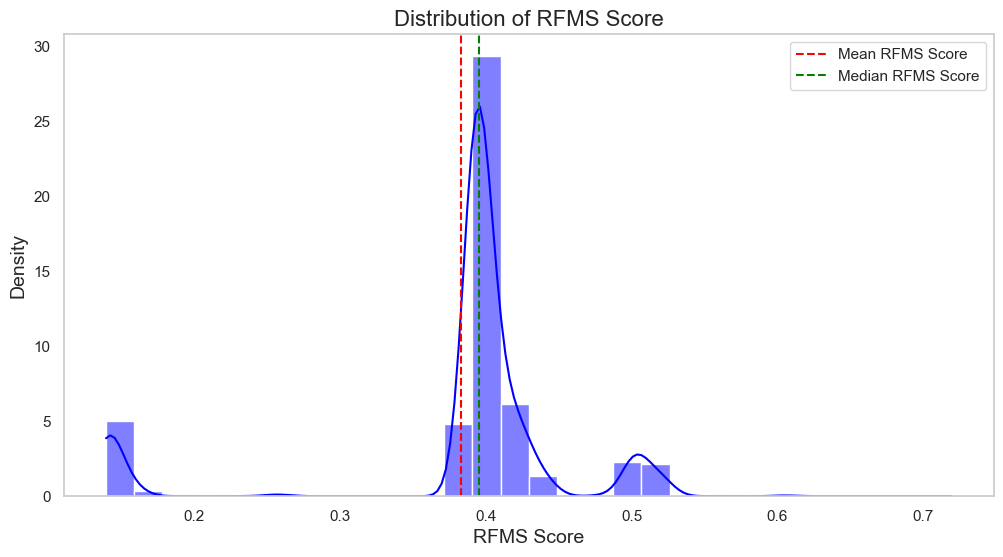

In [86]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting RFMS Score distribution
plt.figure(figsize=(12, 6))
sns.histplot(final_df['RFMS_Score'], bins=30, kde=True, color='blue', stat='density')

# Adding title and labels
plt.title('Distribution of RFMS Score', fontsize=16)
plt.xlabel('RFMS Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.axvline(final_df['RFMS_Score'].mean(), color='red', linestyle='--', label='Mean RFMS Score')
plt.axvline(final_df['RFMS_Score'].median(), color='green', linestyle='--', label='Median RFMS Score')
plt.legend()
plt.grid()
plt.show()


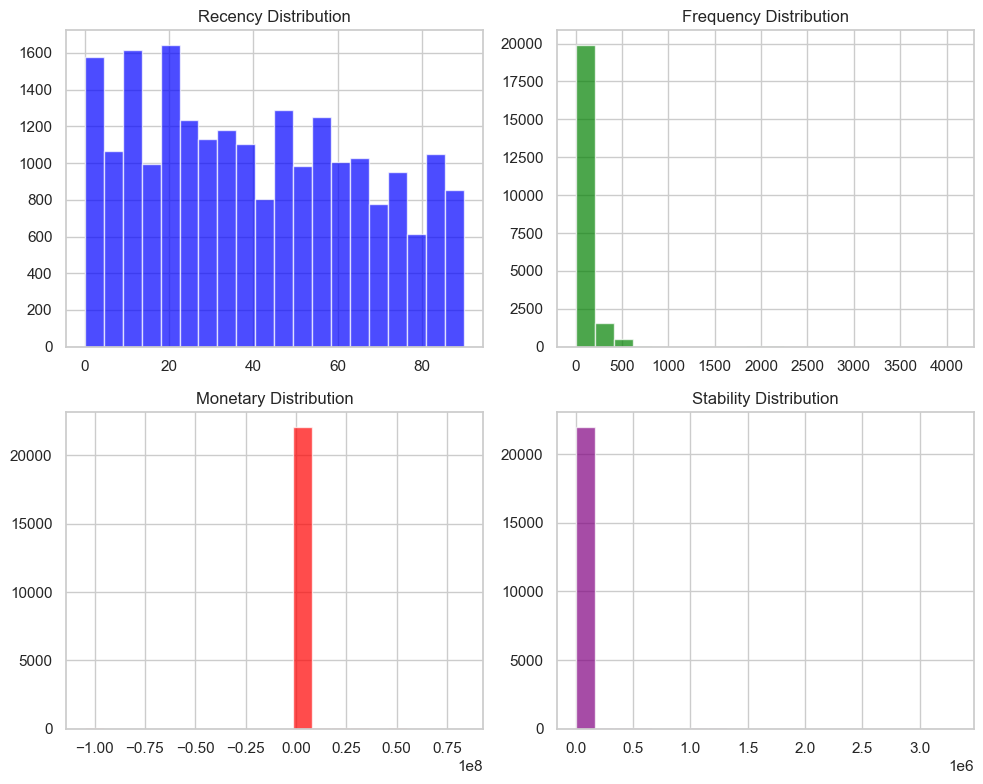

In [87]:
# Recency: Calculate the days since the user's last transaction.
df['Recency'] = (df['TransactionStartTime'].max() - df['TransactionStartTime']).dt.days

# Frequency: Count the number of transactions per user.
frequency_df = df.groupby('CustomerId').size().reset_index(name='Frequency')

# Monetary: Sum of transaction amounts per user.
monetary_df = df.groupby('CustomerId')['Amount'].sum().reset_index(name='Monetary')
# Stability: Standard deviation of transaction amounts per user.
stability_df = df.groupby('CustomerId')['Amount'].std().reset_index(name='Stability').fillna(0)
# Merge RFMS components into one dataframe
rfms_df = pd.merge(frequency_df, monetary_df, on='CustomerId')
rfms_df = pd.merge(rfms_df, stability_df, on='CustomerId')

# Add recency
rfms_df = pd.merge(rfms_df, df[['CustomerId', 'Recency']].drop_duplicates(), on='CustomerId')
# Visualize RFMS components
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes[0, 0].hist(rfms_df['Recency'], bins=20, color='blue', alpha=0.7)
axes[0, 0].set_title('Recency Distribution')
axes[0, 1].hist(rfms_df['Frequency'], bins=20, color='green', alpha=0.7)
axes[0, 1].set_title('Frequency Distribution')
axes[1, 0].hist(rfms_df['Monetary'], bins=20, color='red', alpha=0.7)
axes[1, 0].set_title('Monetary Distribution')
axes[1, 1].hist(rfms_df['Stability'], bins=20, color='purple', alpha=0.7)
axes[1, 1].set_title('Stability Distribution')
plt.tight_layout()
plt.show()

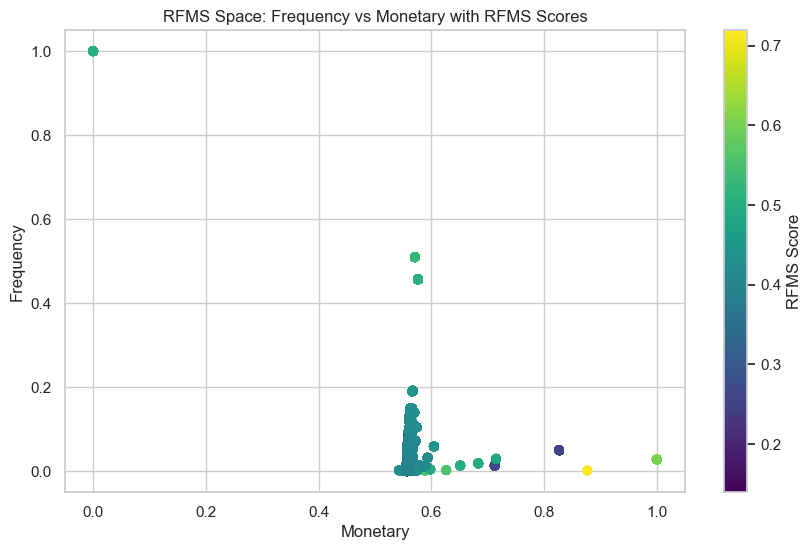

In [88]:
# Visualize RFMS space (scatter plot of RFMS scores)
plt.figure(figsize=(10,6))
plt.scatter(final_df['Monetary'], final_df['Frequency'], c=final_df['RFMS_Score'], cmap='viridis')
plt.colorbar(label='RFMS Score')
plt.title('RFMS Space: Frequency vs Monetary with RFMS Scores')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.show()

In [89]:

# Assign labels based on a threshold (good: RFMS score > 0.5, bad: RFMS score <= 0.5)
threshold = 0.5
final_df['Risk_Label'] = np.where(final_df['RFMS_Score'] > threshold, 'Good', 'Bad')

# Check label distribution
print(final_df['Risk_Label'].value_counts())


Risk_Label
Bad     87424
Good     8238
Name: count, dtype: int64


### 4.2 Perform Weight of Evidence (WoE) Binning
WoE binning helps transform continuous or categorical variables for logistic regression or other models. The formula for WoE is:

$$
\text{WoE} = \ln\left(\frac{\text{Bad customers in bin}}{\text{Good customers in bin}}\right)
$$

We will apply WoE binning to our numerical features (Monetary, Frequency, etc.).

In [91]:
# Helper function to calculate WoE and IV for binning
def woe_binning(df, feature, target):
    df['bin'] = pd.qcut(df[feature], q=10, duplicates='drop')  # Create quantile-based bins
    bin_stats = df.groupby('bin').agg(
        bad_count=(target, lambda x: (x == 'Bad').sum()),
        good_count=(target, lambda x: (x == 'Good').sum()),
        total_count=(target, 'count')
    ).reset_index()

    # Calculate WoE and IV
    bin_stats['bad_rate'] = bin_stats['bad_count'] / bin_stats['bad_count'].sum()
    bin_stats['good_rate'] = bin_stats['good_count'] / bin_stats['good_count'].sum()
    bin_stats['WoE'] = np.log(bin_stats['good_rate'] / bin_stats['bad_rate'])
    bin_stats['IV'] = (bin_stats['good_rate'] - bin_stats['bad_rate']) * bin_stats['WoE']

    return bin_stats[['bin', 'bad_count', 'good_count', 'WoE', 'IV']], bin_stats['IV'].sum()

# Apply WoE binning to selected features
woe_features = ['Monetary', 'Frequency', 'Recency', 'Stability']
for feature in woe_features:
    print(f"\nFeature: {feature}")
    bin_stats, iv = woe_binning(final_df, feature, 'Risk_Label')
    print(bin_stats)
    print(f"Information Value (IV) for {feature}: {iv:.4f}")



Feature: Monetary
                bin  bad_count  good_count       WoE        IV
0  (-0.0001, 0.557]       5481        4091  2.069514  0.897976
1   (0.557, 0.5572]       9568           0      -inf       inf
2  (0.5572, 0.5574]       9578           0      -inf       inf
3  (0.5574, 0.5576]       9605           0      -inf       inf
4   (0.5576, 0.558]       9552           0      -inf       inf
5   (0.558, 0.5585]       9578           0      -inf       inf
6  (0.5585, 0.5599]       9550           0      -inf       inf
7  (0.5599, 0.5617]       9724           0      -inf       inf
8  (0.5617, 0.5669]       9558           0      -inf       inf
9     (0.5669, 1.0]       5230        4147  2.129986  0.944810
Information Value (IV) for Monetary: inf

Feature: Frequency
                  bin  bad_count  good_count       WoE        IV
0   (-0.001, 0.00244]       9565          23 -3.668359  0.391111
1  (0.00244, 0.00538]       9600           0      -inf       inf
2     (0.00538, 0.01]       9699

C:\Users\getac\AppData\Local\Temp\ipykernel_2588\132783187.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = df.groupby('bin').agg(
c:\Users\getac\anaconda3\envs\myenve\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\getac\AppData\Local\Temp\ipykernel_2588\132783187.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = df.groupby('bin').agg(
c:\Users\getac\anaconda3\envs\myenve\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
 

                    bin  bad_count  good_count       WoE        IV
0    (-0.001, 0.000464]       9582           0      -inf       inf
1  (0.000464, 0.000776]       9598           0      -inf       inf
2   (0.000776, 0.00113]       9539           0      -inf       inf
3    (0.00113, 0.00157]       9609           0      -inf       inf
4    (0.00157, 0.00178]       7783        2085  1.044839  0.171426
5    (0.00178, 0.00213]       9236           0      -inf       inf
6    (0.00213, 0.00261]       7699        1869  0.946325  0.131360
7    (0.00261, 0.00379]       9559           0      -inf       inf
8    (0.00379, 0.00653]       5476        4091  2.070427  0.898490
9        (0.00653, 1.0]       9343         193 -1.517680  0.126638
Information Value (IV) for Stability: inf


c:\Users\getac\anaconda3\envs\myenve\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [92]:
df.to_csv("../data/Credit_Risk_Analysis.csv", index=False)

In [93]:
df = pd.read_csv('../data/Credit_Risk_Analysis.csv')

In [94]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Value,TransactionStartTime,PricingStrategy,FraudResult,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Recency,bin
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,1000,2018-11-15 02:18:49+00:00,2,0,2,15,11,2018,90,"(0.5574, 0.5576]"
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,20,2018-11-15 02:19:08+00:00,2,0,2,15,11,2018,90,"(0.5574, 0.5576]"
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,500,2018-11-15 02:44:21+00:00,2,0,2,15,11,2018,90,"(-0.0001, 0.557]"
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,21800,2018-11-15 03:32:55+00:00,2,0,3,15,11,2018,90,"(0.558, 0.5585]"
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,644,2018-11-15 03:34:21+00:00,2,0,3,15,11,2018,90,"(0.558, 0.5585]"


In [95]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'Transaction_Hour', 'Transaction_Day', 'Transaction_Month',
       'Transaction_Year', 'Recency', 'bin'],
      dtype='object')